# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### hue_spectrum

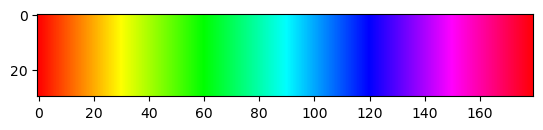

In [6]:
hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)
img = np.array([hue_spectrum]*30)
saturation_channel = np.ones_like(img, dtype='uint8')*255
value_channel = np.ones_like(img, dtype='uint8')*255

hsv = cv2.merge([img, saturation_channel, value_channel])
final_bgr_spectrum = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(final_bgr_spectrum[...,::-1])

### Find Yellows

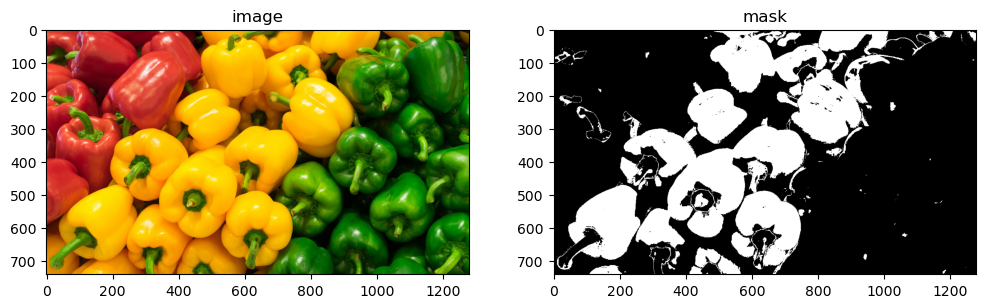

In [2]:

image = cv2.imread('images/felfel-dolme.jpg')

# define range of BLUE color in HSV
lower = np.array([20,50,50])
upper = np.array([35,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

#show
plt.figure(figsize=[12,6])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(122);plt.imshow(mask,cmap='gray');plt.title("mask");

### filter reds

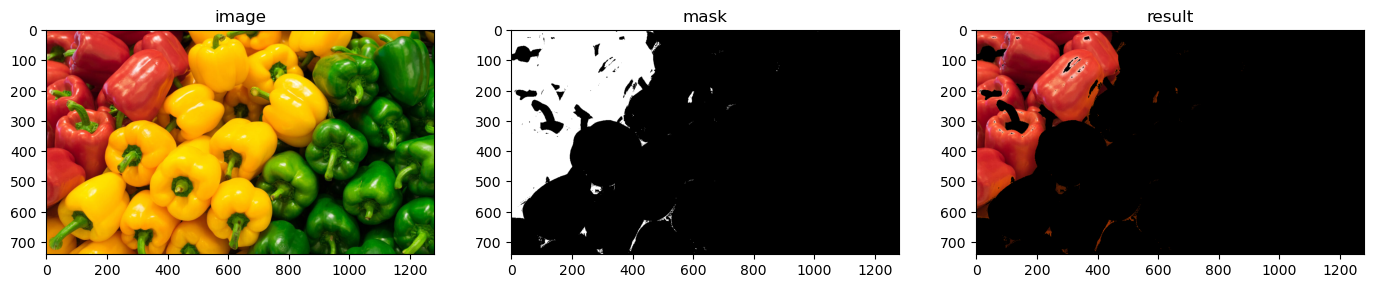

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('images/felfel-dolme.jpg')
# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([160,50,50])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join masks
mask = mask0+mask1

#result
result = cv2.bitwise_and(image,image, mask=mask)

#show
plt.figure(figsize=[17,7])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(133);plt.imshow(result[...,::-1]);plt.title("result");
